# Analisis PMV

In [1]:
#Importar paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archivo = "/BBDD CENTRAL 2020.xlsx"
ruta = "C:/Users/JESCOBARO/Desktop" + archivo
# archivo = "/BBDD CENTRAL 2021.xlsm"
# ruta = '//cepnas/planificacion/VCMO/PLACO Refino/01 PLACO REFINO/01 Coordinación MK-VCMO/01 ESTUDIOS' + archivo
hojas = ["BDD PAV","BDD PMV M+3","BDD PMV M+2","BDD PMV M+1", "BDD REAL"]
año = archivo[-9:-5]

def leer_bbdd(ruta, hoja):
    """ Leer Base de Datos """
    
    print("Leyendo " + hoja + "...")
    df = pd.read_excel(ruta, sheet_name=hoja)
    try:
        print("Se ha cargado la revisión " + hoja +". Consta de " + str(df.index[-1]) + " filas.")
    except IndexError:
        print("Se ha cargado la revisión " + hoja +". Consta de 0 filas.")
        
    return df

# Creo los 5 Dataframes:
pav = leer_bbdd(ruta, hojas[0])
m3 = leer_bbdd(ruta, hojas[1])
m2 = leer_bbdd(ruta, hojas[2])
m1 = leer_bbdd(ruta, hojas[3])
real = leer_bbdd(ruta, hojas[4])

Leyendo BDD PAV...
Se ha cargado la revisión BDD PAV. Consta de 6158 filas.
Leyendo BDD PMV M+3...
Se ha cargado la revisión BDD PMV M+3. Consta de 5413 filas.
Leyendo BDD PMV M+2...
Se ha cargado la revisión BDD PMV M+2. Consta de 5244 filas.
Leyendo BDD PMV M+1...
Se ha cargado la revisión BDD PMV M+1. Consta de 5307 filas.
Leyendo BDD REAL...
Se ha cargado la revisión BDD REAL. Consta de 187287 filas.


In [3]:
def formato(df, idioma="ES"):
    """Generar Formato para posibles informes"""
    if idioma == "ES":
        # Rename Mes
        df["Mes Año"] = df["Mes Año"].astype(str)
        df["Mes Año"] = df["Mes Año"].replace({año+"01":"Enero "+año, año+"02":"Febrero "+ año, año+"03":"Marzo "+ año
                        , año+"04":"Abril "+ año, año+"05":"Mayo "+ año, año+"06":"Junio "+ año
                        , año+"07":"Julio "+ año, año+"08":"Agosto "+ año, año+"09":"Septiembre "+ año
                        , año+"10":"Octubre "+ año, año+"11":"Noviembre "+ año, año+"12":"Diciembre "+ año
                        })
        # Rename Seg Negocio
        df["Seg Negocio"] = df["Seg Negocio"].replace({"AS":"Asfaltos", "AV":"Aviacion", "BK":"Bunker", "CA": "Canarias", 
                         "VD":"Ventas Directas", "OM":"Otras Marcas", "RE": "Red", 
                         "PP":"Postes Pesca", "CD":"Clientes Directos", "CG": "Clientes Grupo", 
                         "CM":"Ceuta & Melilla", "CE":"Clientes Estrategicos", "EX":"Exportaciones"})
                                
    ## Ingles    
    elif idioma == "EN":
        # Rename Mes
        df["Mes Año"] = df["Mes Año"].astype(str)
        df["Mes Año"] = df["Mes Año"].replace({año+"01":"January "+año, año+"02":"February "+ año, año+"03":"March "+ año
                          , año+"04":"April "+ año, año+"05":"May "+ año, año+"06":"June "+ año
                          , año+"07":"July "+ año, año+"08":"August "+ año, año+"09":"September "+ año
                          , año+"10":"October "+ año, año+"11":"November "+ año, año+"12":"December "+ año
                          })
        # Rename Seg Negocio
        df["Seg Negocio"] = df["Seg Negocio"].replace({"AS":"Asphalts", "AV":"Aviation", "BK":"Bunker", "CA": "Canaries", 
                                 "VD":"Wholesale", "OM":"Other Brands", "RE": "Network", 
                                 "PP":"Unflaged Service Stations", "CD":"Direct Clients", "CG": "Group Clients", 
                                 "CM":"Ceuta & Melilla", "CE":"Strategic Clients"})
    else:
        pass
    
# Formateo los 5 Dataframes:
formatear = False
if formatear == True:
    pav = formato(pav, "ES")
    m3 = formato(m3, "ES")
    m2 = formato(m2, "ES")
    m1 = formato(m1, "ES")
    real = formato(real, "ES")

In [8]:
def dataframe_meses_seg(df):
    """ Genera Tabla Mes Año vs Seg Negocio """
    
    # Crear DataFrame Meses vs Seg Negocio y sumar Ventas TM.
    seg_negocios = df["Seg Negocio"].unique()
    meses = df["Mes Año"].unique()
    df_tabla = pd.DataFrame(columns = seg_negocios)
    print("")
    print("Generando DataFrame " + str(df.loc[0,"Revision"]) + " " + año + "...")
    for mes in meses: 
        df_tabla.loc[str(mes)] = [ df[ (df["Mes Año"] == mes) & (df["Seg Negocio"] == seg) ]["Ventas TM"].sum() for seg in seg_negocios]
        
    seg_negocios = list(df_tabla.columns.values)
    try:
        meses = [s.replace(" "+año,"") for s in list(df_tabla.index.values)]
    except:
        meses = list(df_tabla.index.values)
    
    try:
        print("Tabla generada para el " + str(df.loc[0,"Revision"]) + " " + año + ".")
        print("Información para los meses de: " + ", ".join(meses) + ".")
        print("Información de los siguientes Negocios: " + ", ".join(seg_negocios) + ".")
    except:
        print("Tabla vacia")
        
    print("")  
    display(df_tabla)
    return df_tabla



# Creo las 5 tablas de los Dataframes: Fromato S_ES: Español, S_EN: Ingles
pav_tabla = dataframe_meses_seg(pav)
m3_tabla = dataframe_meses_seg(m3)
m2_tabla = dataframe_meses_seg(m2)
m1_tabla = dataframe_meses_seg(m1)
real_tabla = dataframe_meses_seg(real)


Generando DataFrame PAV 2020...
Tabla generada para el PAV 2020.
Información para los meses de: 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012.
Información de los siguientes Negocios: AS, AV, BK, CD, CE, CG, CA, CM, EX, RE, VD, OM, PP.



,AS,AV,BK,CD,CE,CG,CA,CM,EX,RE,VD,OM,PP
202001,61507.679181,243611.634934,395635.449262,11000.0,37569.057706,694725.068016,165787.179882,11241.067087,265846.142664,354012.575792,218715.184834,81791.058,4055.68393
202002,68075.568247,198060.264390,395635.449262,11792.9,36845.506856,690606.988016,164680.745108,11241.067087,144659.590225,344143.722058,220796.379007,81790.308,4157.08393
202003,92392.914415,250095.762483,395635.449262,14922.0,37847.078160,678424.588016,165862.533415,11241.067087,215126.380746,390140.004639,214971.561619,81790.308,4457.41893
202004,110859.022009,228795.440700,395635.449262,14921.9,38205.868820,618045.008016,165621.505691,11241.067087,185601.185751,381806.646338,188640.238789,81789.558,4847.21893
202005,121804.579178,228090.898530,395635.449262,15417.0,25710.858911,417306.678016,164217.113431,11241.067087,272925.716220,392240.559908,182935.390704,81790.308,5588.50238
202006,129017.715876,255854.513063,395635.449262,14424.0,39104.718854,387088.298016,164795.788495,11241.067087,216543.018268,409518.330251,171189.848947,81789.558,6125.92238
202007,145717.941022,265349.069303,395635.449262,15418.0,25858.270453,627761.228016,165997.338743,11241.067087,211560.361490,456825.770425,177126.592505,81788.713,6988.66738
202008,91912.274787,276374.972952,395635.449262,15418.0,41161.362814,464425.398420,164560.116037,11241.067087,186479.278812,446411.523042,173805.069304,81788.713,5708.49238
202009,109691.597145,257109.996959,395635.449262,14424.0,39660.364909,475101.758016,164630.352086,11241.067087,180446.754818,393803.610085,162927.765610,81794.355,4881.62369
202010,104191.132942,293201.961918,395635.449262,15418.0,24988.214084,491017.178016,165753.391313,11241.067087,180407.988148,402796.404484,211261.316060,81784.308,4432.06869



Generando DataFrame M+3 2020...
Tabla generada para el M+3 2020.
Información para los meses de: 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012.
Información de los siguientes Negocios: AS, AV, BK, CD, CE, CG, CA, CM, EX, RE, VD, OM, PP.



,AS,AV,BK,CD,CE,CG,CA,CM,EX,RE,VD,OM,PP
202001,83300.0,236952.160000,296961.820818,11000.0,22384.695998,777229.320000,187923.340619,9328.015000,235203.125000,345205.951454,218715.184834,79207.9850,4055.683930
202002,101400.0,199318.004238,362338.420818,11793.0,26759.380000,697661.830000,200159.119027,14538.215000,195380.500000,340535.046099,220796.379007,79367.1360,4157.083930
202003,87750.0,209207.360000,371519.070818,29758.0,47033.970000,697692.910000,200449.169815,4538.215000,197521.450000,377826.635079,215536.618702,50547.0900,4457.418930
202004,122650.0,257249.760000,384398.075818,24786.0,45183.805000,684505.270000,192581.312428,4522.265000,238708.195000,370127.043404,190957.401777,50781.7500,4847.218930
202005,107150.0,225897.112000,404966.075818,24142.0,51432.005000,592477.112000,182520.043521,4522.265000,259920.805000,379714.145130,169572.912139,43607.6510,5588.502380
202006,87850.0,135493.261115,314019.070818,23064.0,28608.315000,611996.090000,161791.815174,3860.455125,390797.765261,348210.757945,151174.139786,25774.9350,5513.330142
202007,83028.0,116713.393986,283133.048818,23814.0,43492.970000,551443.080000,153354.474850,2391.680000,219140.885000,346222.235193,151229.342012,39202.8450,5836.484011
202008,83028.0,86808.100000,302522.048818,24124.0,42220.345000,547095.620000,150666.478038,2633.630000,171151.840000,345532.710536,138226.401211,38015.5650,5708.492380
202009,84525.0,91426.548010,309054.123818,23355.0,44179.749455,469273.560000,155449.541644,3389.225000,158226.772585,352359.859551,155269.773313,43407.4650,4881.623690
202010,88600.0,133032.644298,306898.476394,28175.0,45765.469236,590981.190000,175253.821247,3274.577000,281129.643526,362885.121674,183669.415409,44378.6675,4478.722150



Generando DataFrame M+2 2020...
Tabla generada para el M+2 2020.
Información para los meses de: 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012.
Información de los siguientes Negocios: AS, AV, BK, CD, CE, CG, CA, CM, RE, VD, OM, PP.



,AS,AV,BK,CD,CE,CG,CA,CM,RE,VD,OM,PP
202001,77400.0,239218.560000,364519.070818,11000.0,45969.180000,759814.73,213873.794269,9343.4400,341951.908793,218715.184832,79367.136000,4055.683930
202002,101400.0,192735.360000,361038.420818,27689.0,26259.380000,672688.66,202976.925109,4343.4400,340151.986400,223189.135025,50547.090000,4157.083930
202003,90200.0,205119.360000,380311.375818,29758.0,25345.970000,698511.61,195185.228452,4327.4900,370329.589571,215536.808101,50781.750000,4457.418930
202004,113650.0,218382.048000,393654.075818,24786.0,28554.135000,659202.91,183296.411913,4327.4900,379885.066091,182174.720204,43607.651000,4847.218930
202005,86750.0,53982.042432,306216.048818,24142.0,42290.345000,587737.38,164968.147560,3381.8865,314882.118471,138245.478474,25774.935000,4750.227023
202006,78975.0,94697.180836,279984.409818,23064.0,27382.910000,512933.89,136937.028680,2391.6800,301932.607400,151173.874588,34075.174847,5513.330142
202007,83028.0,107263.300000,302522.048818,23814.0,29547.390000,560302.50,149450.779623,2633.6300,314798.469684,150578.453409,35853.389999,5836.484011
202008,90325.0,92627.075945,307454.345818,19968.0,39671.299985,630251.09,145393.931624,3389.2250,342649.279825,138226.401208,38015.565000,5708.492380
202009,93300.0,91082.588011,304898.476394,24231.0,26839.720403,455823.07,159438.829575,3274.5770,339524.676767,150771.330739,44378.667500,4933.237150
202010,88400.0,145020.507154,311538.153185,28175.0,27264.585000,584754.90,157217.080702,3299.2670,352006.823757,183669.415408,46691.935000,4478.722150



Generando DataFrame PMV 2020...
Tabla generada para el PMV 2020.
Información para los meses de: 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012.
Información de los siguientes Negocios: AS, AV, BK, CD, CE, CG, CA, CM, EX, RE, VD, OM, PP.



,AS,AV,BK,CD,CE,CG,CA,CM,EX,RE,VD,OM,PP
202001,70750.0,252697.960001,360417.135818,39907.000000,45236.490001,717959.860000,197368.756701,4052.850004,229592.000000,343562.393298,220275.384040,50547.090020,4055.683939
202002,118100.0,186323.360001,356071.310818,40947.000000,41819.930000,662303.200000,173558.510374,3933.584999,324810.000000,338925.626082,223190.022748,50781.750006,4157.083943
202003,94500.0,247548.954641,374120.550818,40648.000000,41404.475006,650587.500000,178651.199683,3942.575003,346040.000000,364426.453639,195305.549015,43607.651010,4457.418939
202004,70250.0,71485.531101,289926.808818,24388.000000,23846.065001,602101.140000,142008.672642,2215.037503,325800.000000,218307.556406,122706.742124,25774.935009,3393.053253
202005,49350.0,35167.270075,253179.008818,23408.010001,19656.960013,574775.000000,120293.010051,2260.185008,509370.000000,241720.832990,116167.558892,19270.485008,4750.227046
202006,62375.0,85412.900003,296471.409818,21397.000000,56187.662506,629256.000000,131910.604529,2633.629999,430950.000000,252844.420590,126022.725286,29484.070008,5513.330156
202007,93375.0,146771.030402,305454.345818,26872.000000,41639.374604,713965.000000,152482.762615,3406.400009,343697.000000,318385.612185,150578.453454,37415.640014,5836.484051
202008,97600.0,82777.791595,305503.616394,19499.000000,44299.945874,606640.300000,143285.017754,3552.492002,375037.499999,346874.884900,133180.781152,44378.667504,5767.245709
202009,97800.0,129775.387288,314331.438185,28517.000000,41928.390006,462099.000000,149471.708606,3083.327011,308620.000000,331568.333413,150771.330739,46691.935008,4933.237150
202010,102350.0,139371.457290,306538.153185,29852.000000,41544.100006,649827.929178,158054.159075,2935.312004,266190.000000,327963.118531,180969.111081,41796.725012,4478.722154



Generando DataFrame Actual 2020...
Tabla generada para el Actual 2020.
Información para los meses de: 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010.
Información de los siguientes Negocios: AS, AV, BK, CD, CE, CG, CA, CM, EX, RE, VD, OM, PP.



,AS,AV,BK,CD,CE,CG,CA,CM,EX,RE,VD,OM,PP
202001,120623.557,243621.988215,302939.675154,32336.156000,42060.078353,184287.011000,201013.377292,4563.078325,409045.646375,348563.791270,208296.024678,45515.443840,4899.374759
202002,91754.298,189070.609965,314476.044572,46062.918215,37163.197200,159831.601000,166711.730794,3229.677925,322424.192435,342005.492234,191159.523204,51503.151530,3928.473277
202003,76997.092,164607.440275,302132.671215,33168.938000,18562.057730,193180.689000,176353.441198,5330.201325,366909.602585,262258.937554,185911.889549,36428.510373,3585.789979
202004,38964.765,33568.895145,286171.587077,26024.156000,17758.377342,124783.645000,148569.199150,1300.571350,443982.196845,144341.831426,135786.617356,15998.365890,3594.277531
202005,85808.191,15600.754365,282733.671963,25125.748000,37170.666275,107885.132000,130568.143541,2553.220450,555562.071825,212506.196670,135846.978899,23720.745370,4423.238529
202006,99327.352,51082.829115,285048.102510,18741.570000,32233.498900,125559.569265,153382.835365,2514.473250,417589.497115,291657.462285,136114.765725,33113.747415,4976.661470
202007,109765.191,147082.365910,270187.560505,25363.631030,35555.884530,132864.732000,151856.209395,2784.066600,290759.153570,372939.132490,137574.684320,42903.305520,6573.263755
202008,81237.433,82940.742875,334414.943750,24347.312000,34454.159780,140925.609000,149531.845230,3939.223700,445193.602930,359784.951550,124479.170635,45925.138915,6263.158740
202009,84564.305,98185.831115,317467.828180,24405.857000,22566.067625,137045.503000,155171.730350,2900.005300,347619.455020,293478.124550,188922.679230,43271.164395,4538.515855
202010,94628.646,87339.357900,294640.644630,26446.202000,36694.964550,131808.963000,169777.525775,3661.576250,298439.441110,262062.072630,194073.464700,40205.580705,3965.755755


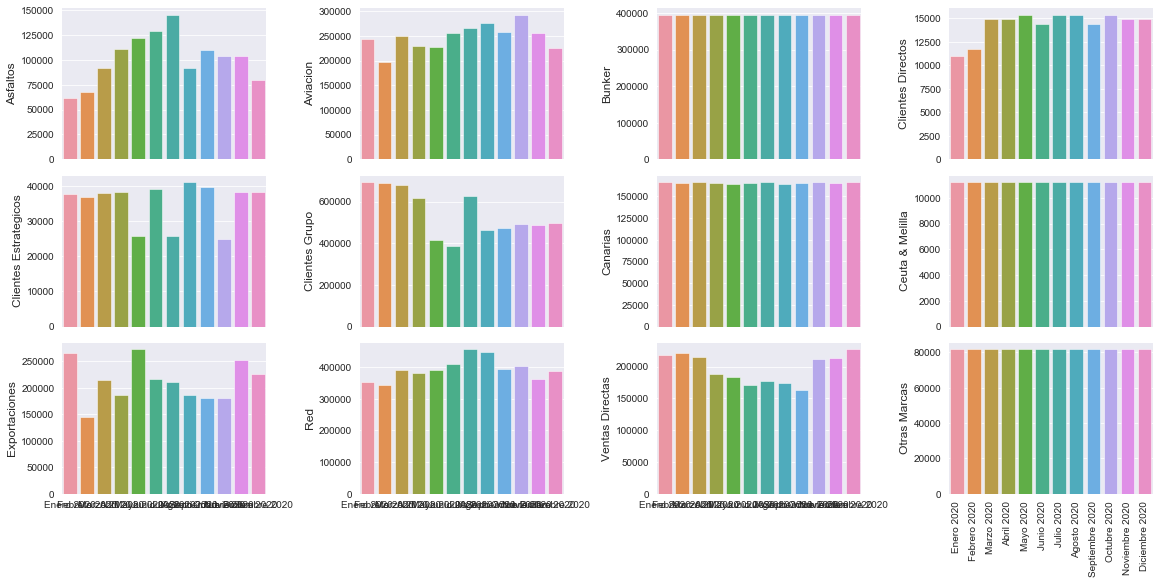

In [60]:
sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)
fig, axs = plt.subplots(nrows=3, ncols=4, sharex='all', figsize=(16, 8), constrained_layout=True)
i = 0
c = 0
j = 0
for i in range(3):
    for c in range(4):
        sns.barplot(data=pav_tabla, x=pav_tabla.index, y=(list(pav_tabla.columns.values))[j], ax=axs[i, c])
        j += 1

for ax in axs:
    plt.xticks(rotation=90)
        
plt.show()

In [19]:
def dataframe_revisiones(mes):
    """ Genera Tabla Comparativa Revisiones """
    
    seg_negocios_pav = pav["Seg Negocio"].unique()
    # Crear DataFrame Mes vs Seg Negocio y sumar Ventas TM.
    def extraer_bbdd(df):
        """ Extraer la info de la BBDD para el mes seleccionado"""
        try:
            revision = str(df.loc[0,"Revision"])
            seg_negocios = df["Seg Negocio"].unique()
            df_tabla = pd.DataFrame(columns = seg_negocios)
            df_tabla.loc[revision] = [ df[ (df["Mes Año"] == mes) & (df["Seg Negocio"] == seg) ]["Ventas TM"].sum() for seg in seg_negocios]
                           
            return df_tabla
        except:
            try:
                # Ponerlo todo a 0 utilizando los segmentos de negocio del PAV
                revision = str(df.loc[0,"Revision"])
                df_tabla.loc[revision] = [ 0 for seg in seg_negocios_pav]
                           
                return df_tabla
            except:
                print("Error")
    
    rev_pav = extraer_bbdd(pav)
    rev_m3 = extraer_bbdd(m3)
    rev_m2 = extraer_bbdd(m2)
    rev_m1 = extraer_bbdd(m1)
    rev_real = extraer_bbdd(real)
    
    # Concateno en una tabla
    df_mes = pd.concat([rev_pav, rev_m3, rev_m2, rev_m1, rev_real])
    df_mes = df_mes.fillna(0)
    #display(df_mes)             
    return df_mes
        
df_mes = dataframe_revisiones(202001)
df_mes

,AS,AV,BK,CD,CE,CG,CA,CM,EX,RE,VD,OM,PP
PAV,61507.679181,243611.634934,395635.449262,11000.000,37569.057706,694725.068016,165787.179882,11241.067087,265846.142664,354012.575792,218715.184834,81791.05800,4055.683930
M+3,83300.000000,236952.160000,296961.820818,11000.000,22384.695998,777229.320000,187923.340619,9328.015000,235203.125000,345205.951454,218715.184834,79207.98500,4055.683930
M+2,77400.000000,239218.560000,364519.070818,11000.000,45969.180000,759814.730000,213873.794269,9343.440000,0.000000,341951.908793,218715.184832,79367.13600,4055.683930
PMV,70750.000000,252697.960001,360417.135818,39907.000,45236.490001,717959.860000,197368.756701,4052.850004,229592.000000,343562.393298,220275.384040,50547.09002,4055.683939
Actual,120623.557000,243621.988215,302939.675154,32336.156,42060.078353,184287.011000,201013.377292,4563.078325,409045.646375,348563.791270,208296.024678,45515.44384,4899.374759


,PAV,M+3,M+2,PMV,Actual
AS,61507.679181,83300.000000,77400.000000,70750.000000,120623.557000
AV,243611.634934,236952.160000,239218.560000,252697.960001,243621.988215
BK,395635.449262,296961.820818,364519.070818,360417.135818,302939.675154
CD,11000.000000,11000.000000,11000.000000,39907.000000,32336.156000
CE,37569.057706,22384.695998,45969.180000,45236.490001,42060.078353
CG,694725.068016,777229.320000,759814.730000,717959.860000,184287.011000
CA,165787.179882,187923.340619,213873.794269,197368.756701,201013.377292
CM,11241.067087,9328.015000,9343.440000,4052.850004,4563.078325
EX,265846.142664,235203.125000,0.000000,229592.000000,409045.646375
RE,354012.575792,345205.951454,341951.908793,343562.393298,348563.791270


In [27]:
meses = [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
df_all_meses = pd.DataFrame()

for mes in meses:
    df_mes = dataframe_revisiones(mes)
    df_mes_trans = df_mes.transpose()
    df_mes_trans["Mes"] = mes
    df_all_meses = pd.concat([df_all_meses, df_mes_trans])

df_all_meses

,PAV,M+3,M+2,PMV,Actual,Mes
AS,61507.679181,83300.000000,77400.000000,70750.000000,120623.557000,202001
AV,243611.634934,236952.160000,239218.560000,252697.960001,243621.988215,202001
BK,395635.449262,296961.820818,364519.070818,360417.135818,302939.675154,202001
CD,11000.000000,11000.000000,11000.000000,39907.000000,32336.156000,202001
CE,37569.057706,22384.695998,45969.180000,45236.490001,42060.078353,202001
...,...,...,...,...,...,...
EX,225278.748884,317090.584135,0.000000,275740.000000,0.000000,202012
RE,388837.125751,366703.623718,322686.825103,253834.901514,0.000000,202012
VD,227361.754069,209769.238091,204911.337905,244279.374288,0.000000,202012
OM,81738.603000,41796.725000,39004.850000,51828.617509,0.000000,202012


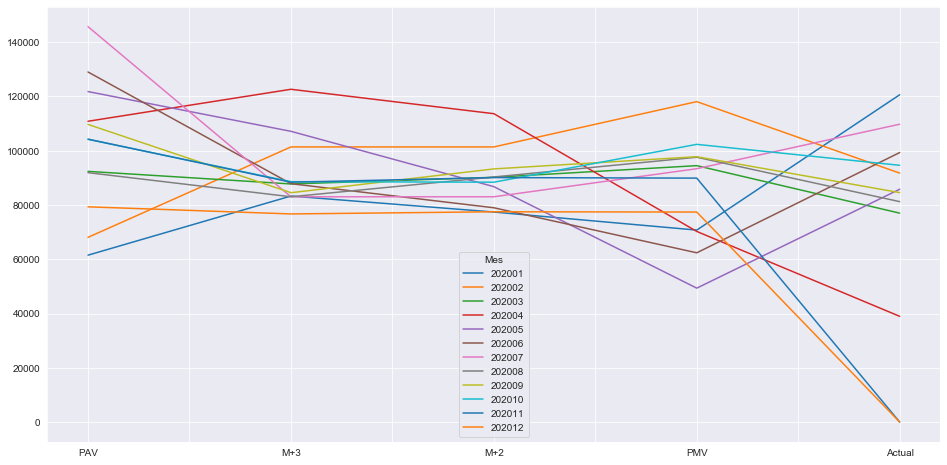

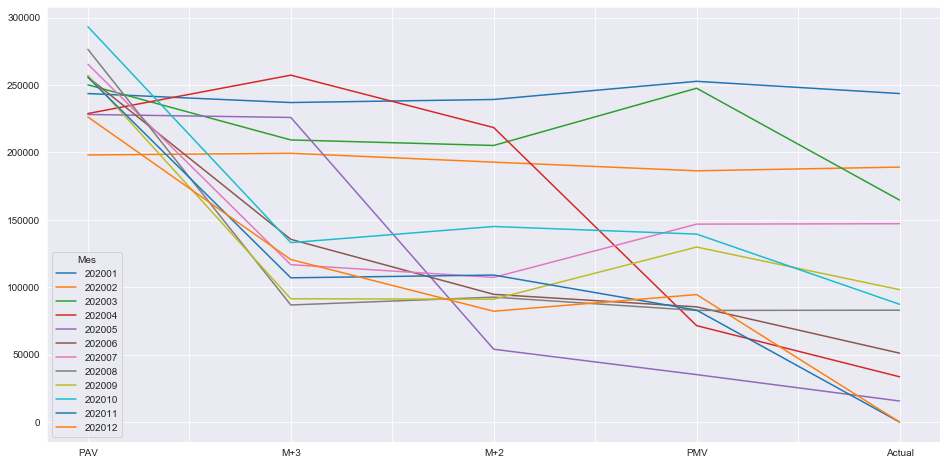

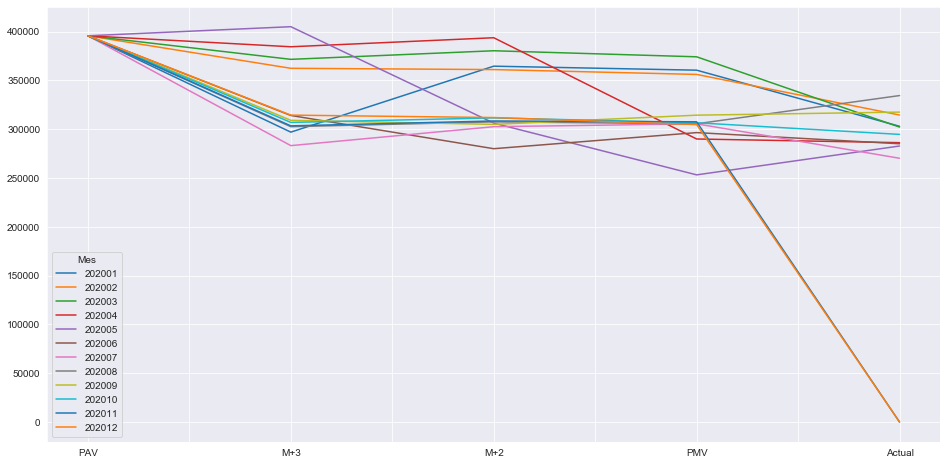

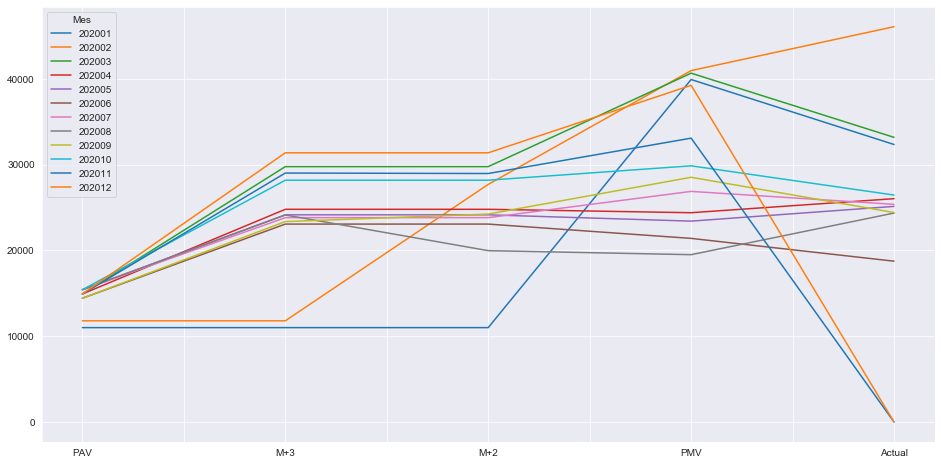

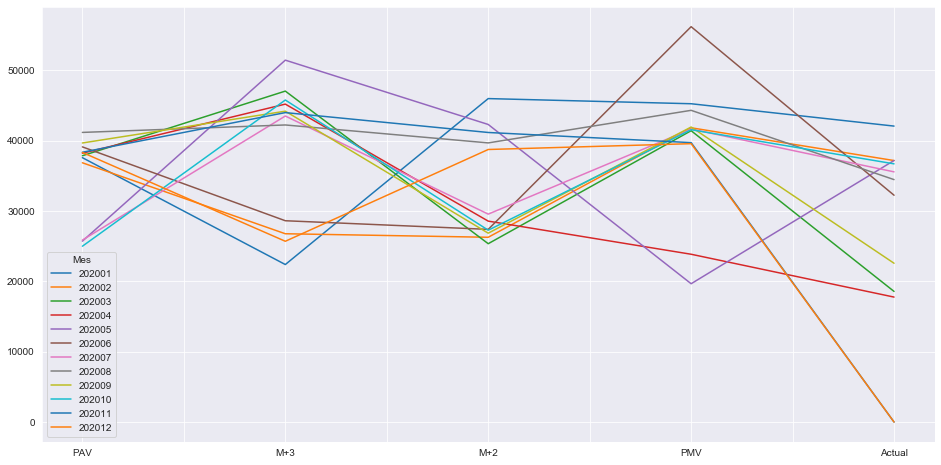

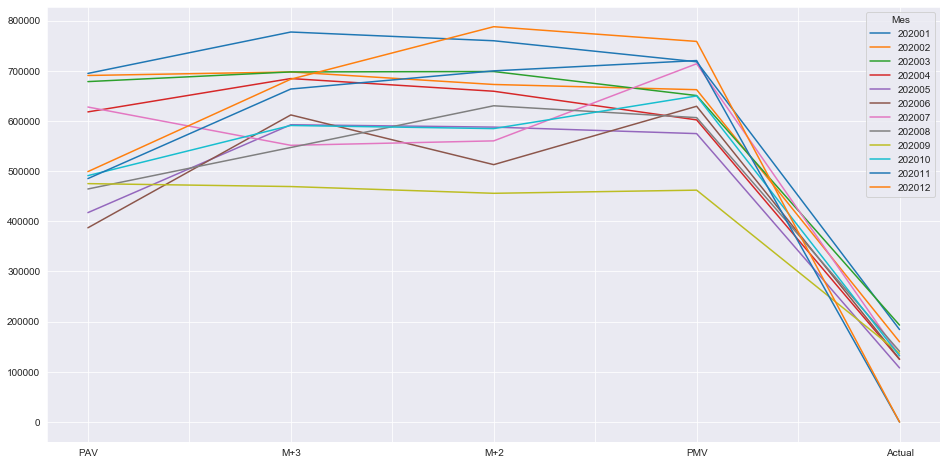

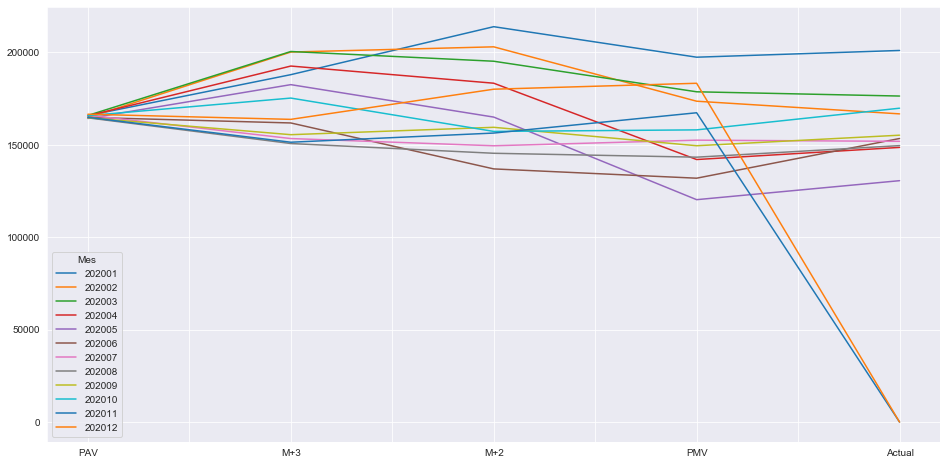

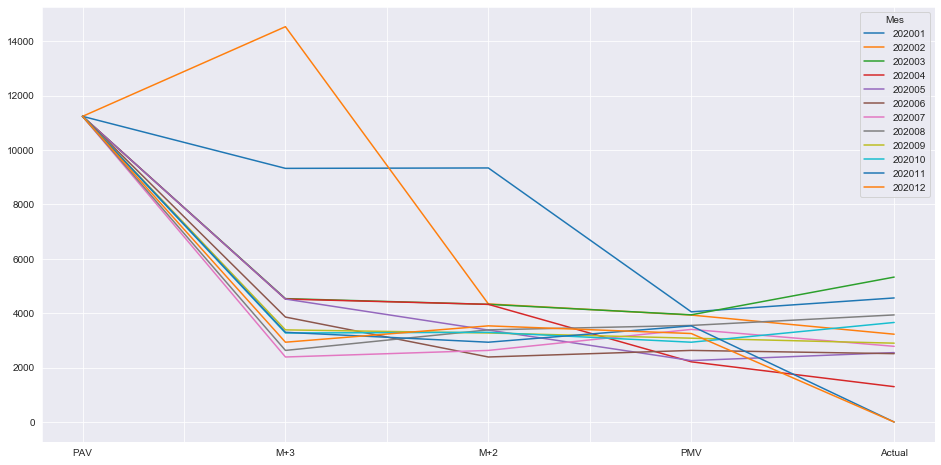

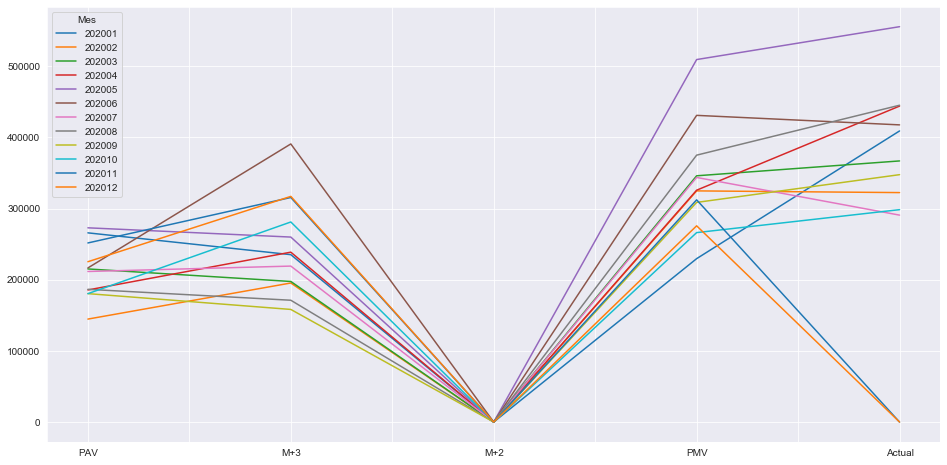

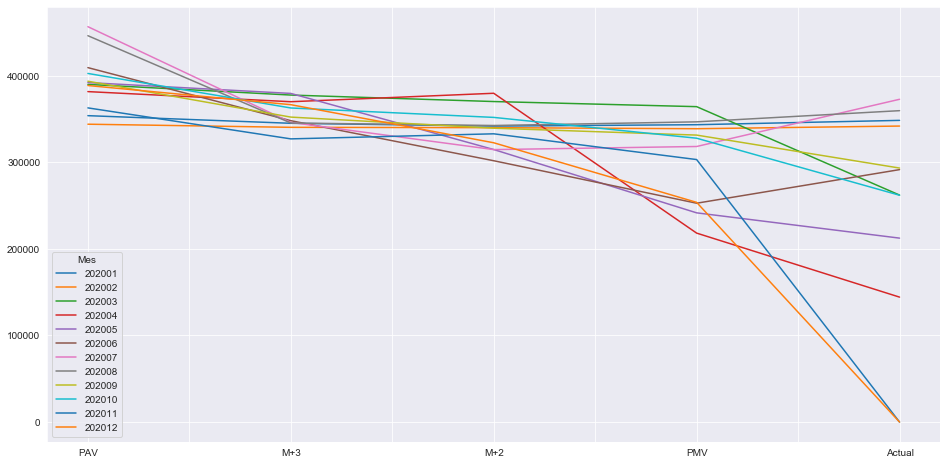

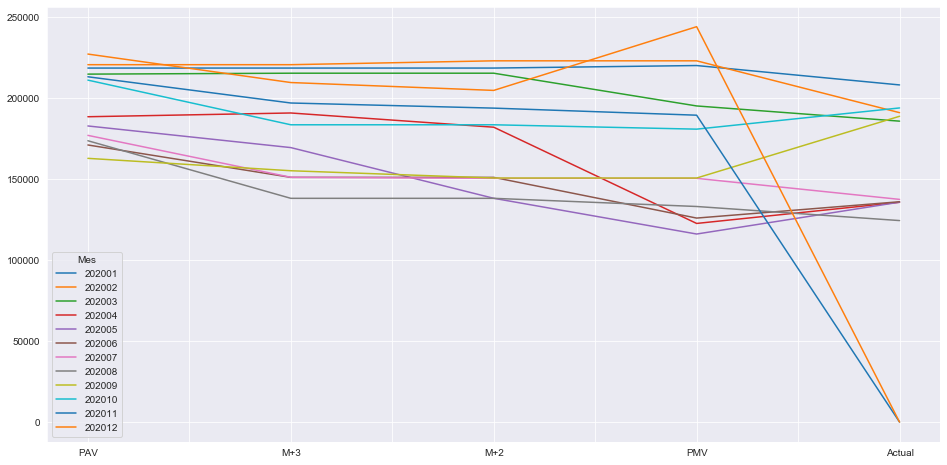

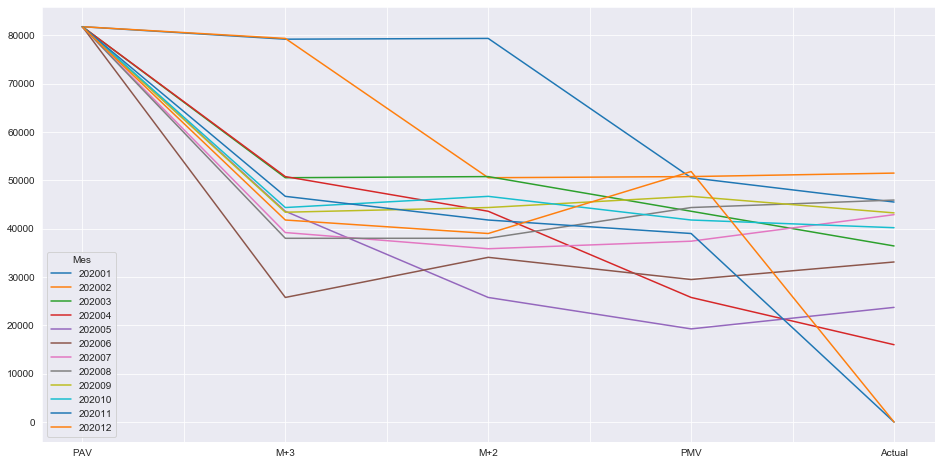

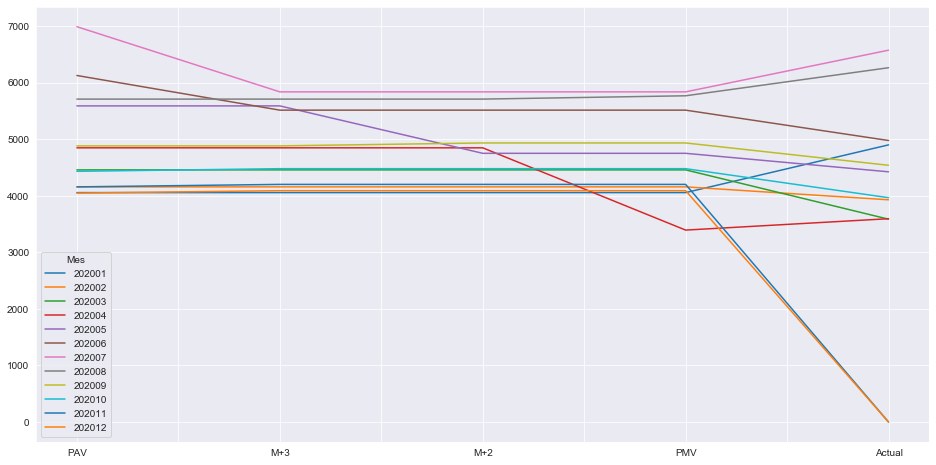

In [40]:
    
for seg in df_all_meses.index.unique():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
    df_seg =  df_all_meses.loc[seg]
    df_seg = df_seg.set_index('Mes')
    df_seg.transpose().plot(ax=ax)

In [ ]:
import math

sns.set_style("darkgrid")
sns.color_palette("mako", as_cmap=True)

# Calcular numero de subplots
total = len(list(df_mes.columns.values))

columnas = 5
filas = total // columnas
filas += math.ceil((total % columnas)/columnas)


fig, axs = plt.subplots(nrows=filas, ncols=columnas, sharex='all', figsize=(16, 8), constrained_layout=True)
i = 0
c = 0
j = 0
for i in range(filas):
    for c in range(columnas):
        sns.barplot(data=df_mes, x=df_mes.index, y=(list(df_mes.columns.values))[j], ax=axs[i, c])
        j += 1

        
plt.show()